<font color = green >


# Clustering 

</font>

Clustering is the task of grouping together similar objects.
<br>
Similarity is a metric that reflects the strength of relationship between two data objects (e.g. distance)

<font color = green >

## K-means

</font>

Algorithm: 
* Initialize $K$ cluster centroids*  
* Repeat till state is stabile: 
       1) assign every point to closest centroid 
       2) compute new centroids as means of samples assigned to corresponding centroid

\*   use multi computation with random initialization of centroids to avoid risk of local optima.

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
%matplotlib notebook

<font color = green >

### Data 

</font>


In [3]:
number_samples= 100 
np.random.seed (2021)
x1,y1 = np.random.randint(0,60,number_samples), np.random.randint(40,100, number_samples)
x2,y2 = np.random.randint(40,100, number_samples), np.random.randint(0,60, number_samples)
x=np.r_[x1,x2]
y=np.r_[y1,y2]

x[:5], y[:5]


(array([52, 21, 57,  0, 45]), array([71, 63, 43, 73, 83]))

<IPython.core.display.Javascript object>


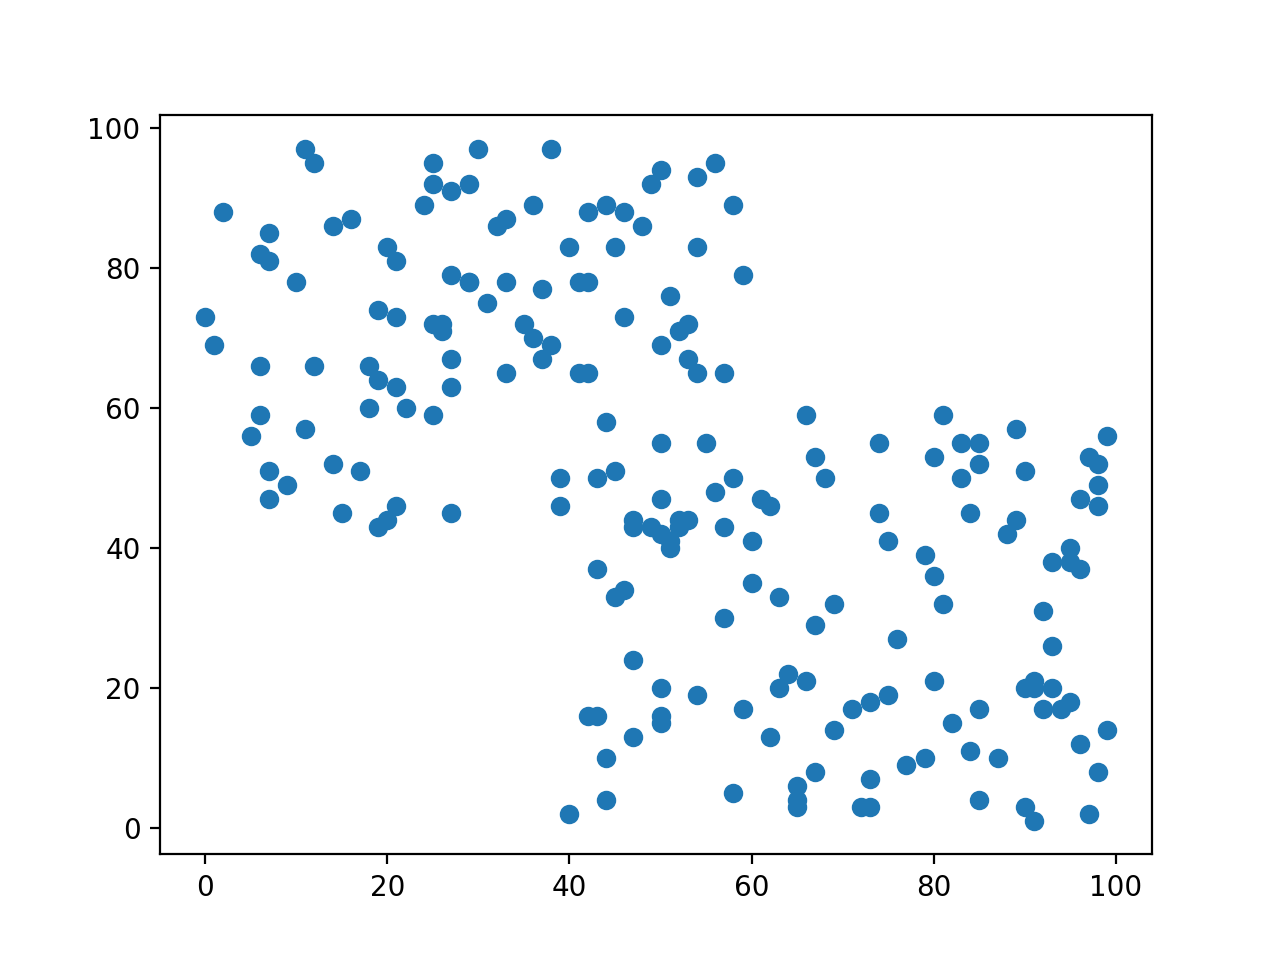

In [4]:
colors = np.array(['green','orange','grey', 'brown'])
def plot_points(closest_centroids = None):
    if closest_centroids is None:
        plt.scatter(x,y)
    else:
        plt.scatter(x,y, c= colors[closest_centroids])

        
plt.figure()
plot_points()

<font color = green >

### Init centroids 

</font>


[[20 20]
 [60 80]
 [60 10]
 [90 90]]


<IPython.core.display.Javascript object>


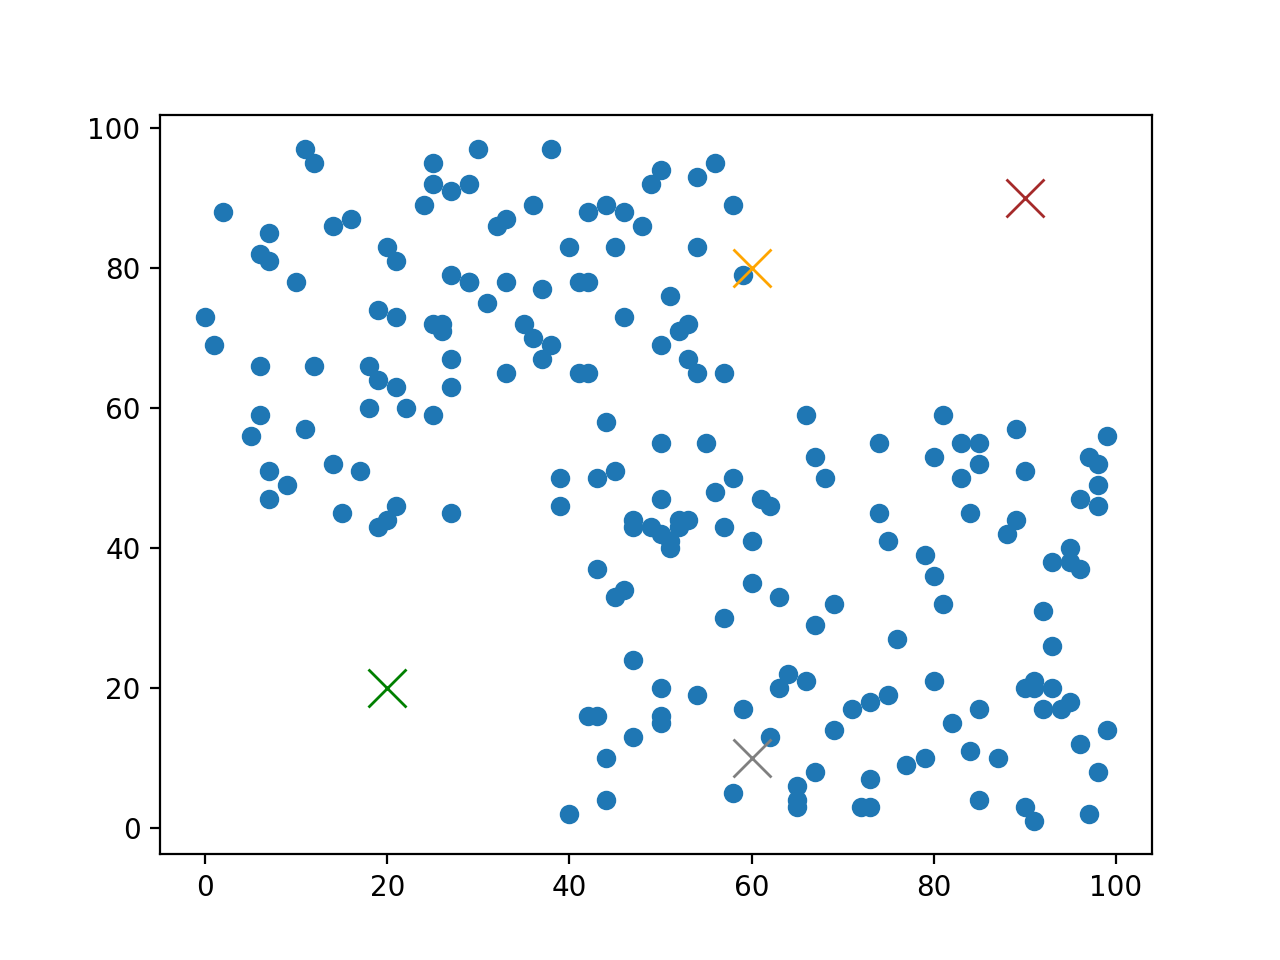

In [5]:
def init_centroids(amount, is_random = True, points = None, seed = 10): 
    if is_random:
        np.random.seed(seed) 
        return points [np.random.choice(len(points), amount)]        
    else:
        centroids = np.array ([(20,20), (60,80), (60,10), (90,90) ])
        return centroids[:amount]

# centroids = init_centroids(2, is_random= False)
centroids = init_centroids(4, is_random= False)
print (centroids)

def plot_centroids(centroids):
    for i, c in enumerate (centroids):
        plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 

def draw_state(centroids = None, closest_centroids = None):        
    plt.figure ()
    plot_points(closest_centroids)
    plot_centroids(centroids)

draw_state(centroids = centroids, closest_centroids=None)

<font color = green >

### Convert data into single array 

</font>


In [6]:
points = np.array(list((zip(x,y))))
points[:5]

array([[52, 71],
       [21, 63],
       [57, 43],
       [ 0, 73],
       [45, 83]])

<font color = green >

### Compute distances from samples to centroids 

</font>


In [7]:
def compute_distances(samples, centroids):
    '''
    params:
        samples - array of samples(pairs of coordinates) to compute from each the distance to sentroid e.g. array([[17, 83],[50, 67]])
        centroids - array of centroids coordinates e.g. array([[20, 20],[60, 80],[60, 10]])
    retruns: 2d array of distances from each sample to all centroid - the axis 0-centroids, 1-samples 
    '''    
    return np.array([np.apply_along_axis(np.linalg.norm, 1, samples-c) for c in centroids])

# compute_distances(points[:3], centroids[:1]) # Note: make sue it is array/list of centroids not the single centroid  

compute_distances(points, centroids)


array([[ 60.20797289,  43.01162634,  43.56604182,  56.64803615,
         67.77905281,  77.64663547,  40.04996879,  44.94441011,
         71.34423593,  58.69412236,  26.01922366,  58.69412236,
         69.11584478,  46.69047012,  80.5294977 ,  63.56099433,
         52.20153254,  48.08326112,  68.24954212,  49.979996  ,
         29.96664813,  52.55473337,  59.03388857,  46.84015371,
         59.48108943,  51.35172831,  70.34202158,  71.69379332,
         54.12023651,  77.62087348,  67.11929678,  57.45432969,
         56.40035461,  70.72481884,  39.40812099,  72.56031973,
         83.19254774,  39.        ,  37.01351105,  79.07591289,
         62.03224968,  66.2721661 ,  33.61547263,  61.00819617,
         41.43669871,  49.65883607,  53.00943312,  71.58910532,
         39.3192065 ,  46.09772229,  58.85575588,  70.83078427,
         39.8246155 ,  50.08991915,  44.01136217,  58.25804665,
         46.04345773,  52.34500931,  25.49509757,  66.09841148,
         71.47027354,  75.42545989,  61.

<font color = green >

### Compute Cost 

</font>

It is used to detect the optimization is completed 


In [8]:
def J(centroids, closest_centroids, points):
    '''
    params: 
        centroids - list/array of pairs (coordinnates)  of centroids e.g. centroids = [(20,20), (60,80), (60,10)]
        closest_centroids - array of len= m (number of samples) that contains indices of centroids e.g. [1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 0 2 0 2 1 2 2 2 2 2 2 1 2 1 2 2 2 2
         1 2 2]
        points  - list/array of points to cluster  
    '''
    all_dist = [] 
    for c_index in set(closest_centroids):
        assigned_samples = points[np.where(closest_centroids==c_index)]# select only points assigned to centroid
        all_dist_centroid = compute_distances(assigned_samples, [centroids[c_index]])
        all_dist.append(np.sum(all_dist_centroid))
    m = len(closest_centroids)
    return 1/m* np.sum(all_dist)

# check the function 
closest_centroids= np.zeros(len(points), dtype=int) # compute for case of all samples assigned to first centroid
print ('Cost= {}'.format(J(centroids, closest_centroids, points )))



Cost= 55.72574477381071


<font color = green >

### Step 1 of iteration: compute closest centroids 

</font>


closest_centroids:
 [1 1 2 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1
 0 2 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 1 2 2 1
 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 2 1 1 1 0 1 1 1 1 1 2 2 2 2 2 2 1 2 2 1 2
 2 2 3 2 2 2 2 2 2 2 3 3 2 2 0 2 2 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 1 2 2 2
 2 3 2 2 2 2 2 1 2 2 0 2 2 2 1 2 2 1 2 3 1 1 2 2 2 2 2 2 1 2 2 2 2 1 1 2 2
 2 2 3 2 0 2 2 2 3 1 2 2 2 2 2]
Cost= 29.032182291821933


<IPython.core.display.Javascript object>


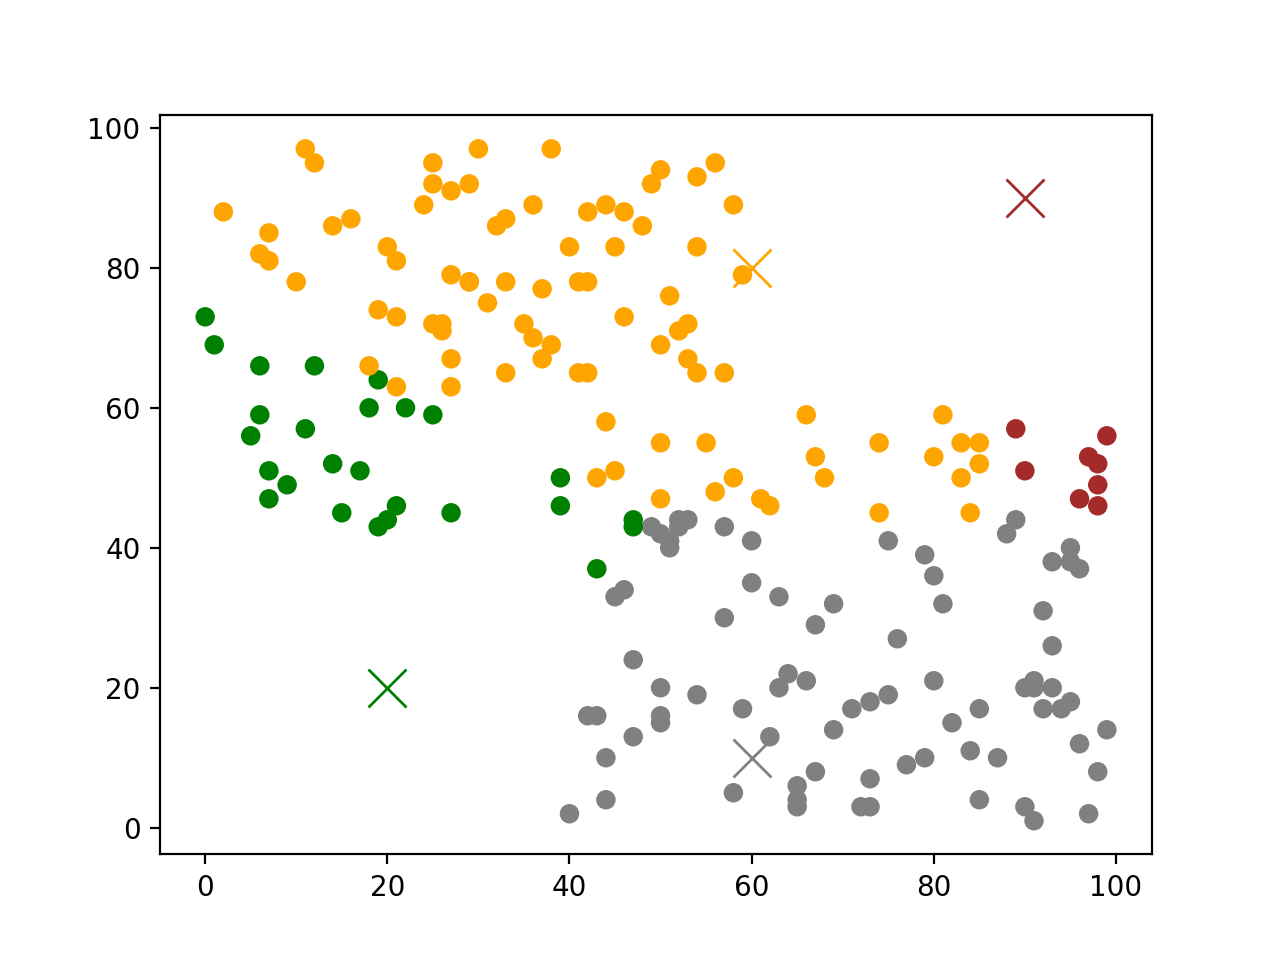

In [9]:
def compute_closest_centroids(centroids):       
    all_distances = compute_distances(points, centroids) #np.array([np.apply_along_axis(np.linalg.norm,1,points-c) for c in centroids])
    closest_centroids = np.apply_along_axis(np.argmin,0,all_distances)
    return closest_centroids

closest_centroids = compute_closest_centroids(centroids) 
print ('closest_centroids:\n',closest_centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids, points)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)


<font color = green >

### Step 2 of iteration: compute means

</font>


New centroids: [array([19.07692308, 53.15384615]), array([41.82954545, 72.85227273]), array([71.03846154, 21.83333333]), array([95.625, 51.375])]
Cost= 19.995076009174205


<IPython.core.display.Javascript object>


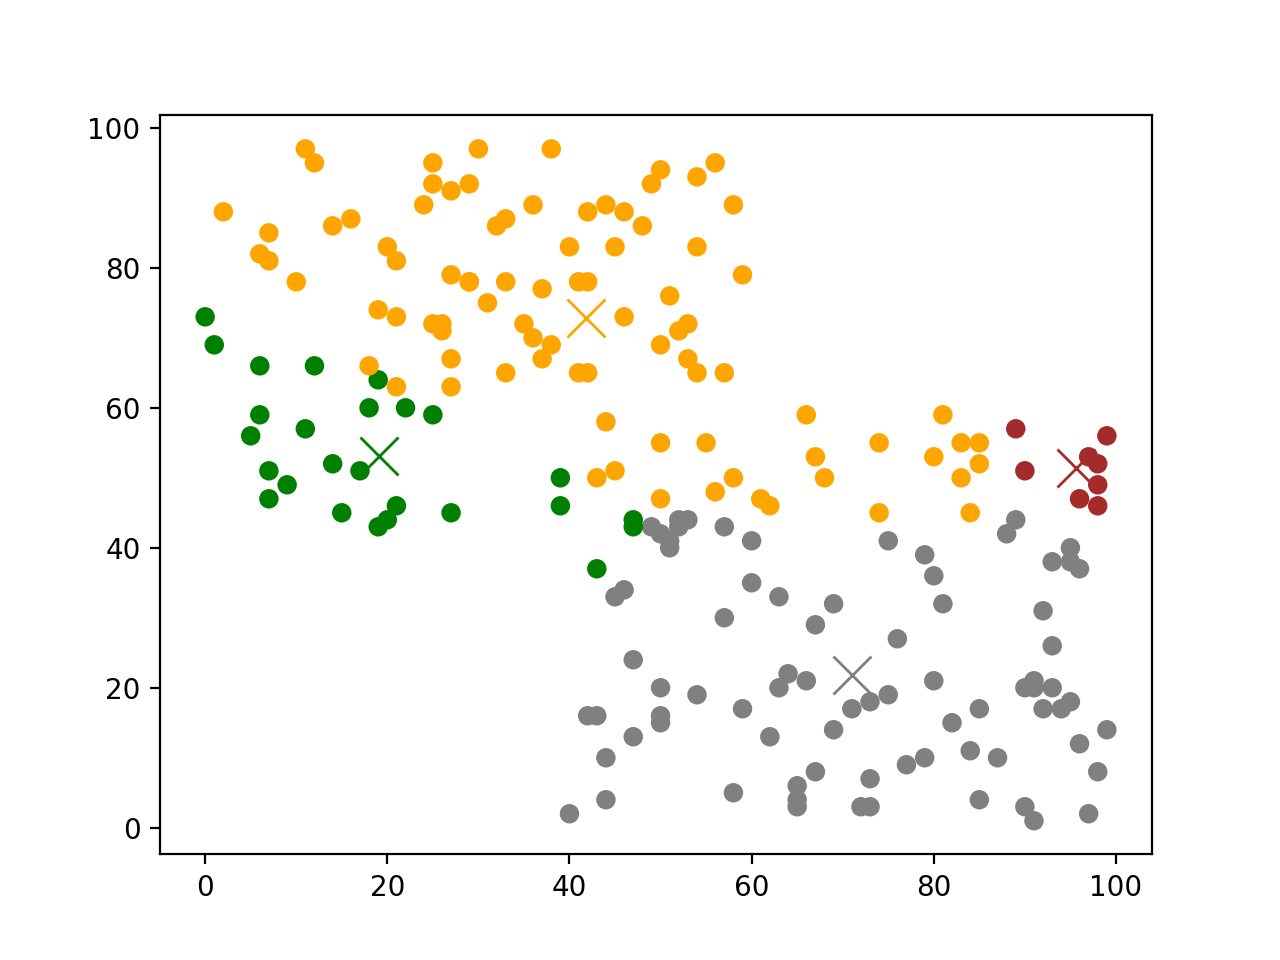

In [10]:
def compute_means(centroids, closest_centroids):     # need to consider all centroids in case of no assigned points to some centroid  
    new_centroids= []
    for i in range (len(centroids)):
        if i not in closest_centroids: # no assigned point assigned to this centroid 
            new_centroids.append(centroids[i])
        else: 
            new_centroid= np.mean(points[np.where(closest_centroids==i)], axis = 0)
            new_centroids.append(new_centroid)
    return new_centroids

centroids = compute_means(centroids, closest_centroids)
print ('New centroids:',centroids)
print ('Cost= {}'.format(J(centroids, closest_centroids, points)))
draw_state(centroids = centroids, closest_centroids = closest_centroids)

<font color = green >

### Iterate

</font>


<IPython.core.display.Javascript object>


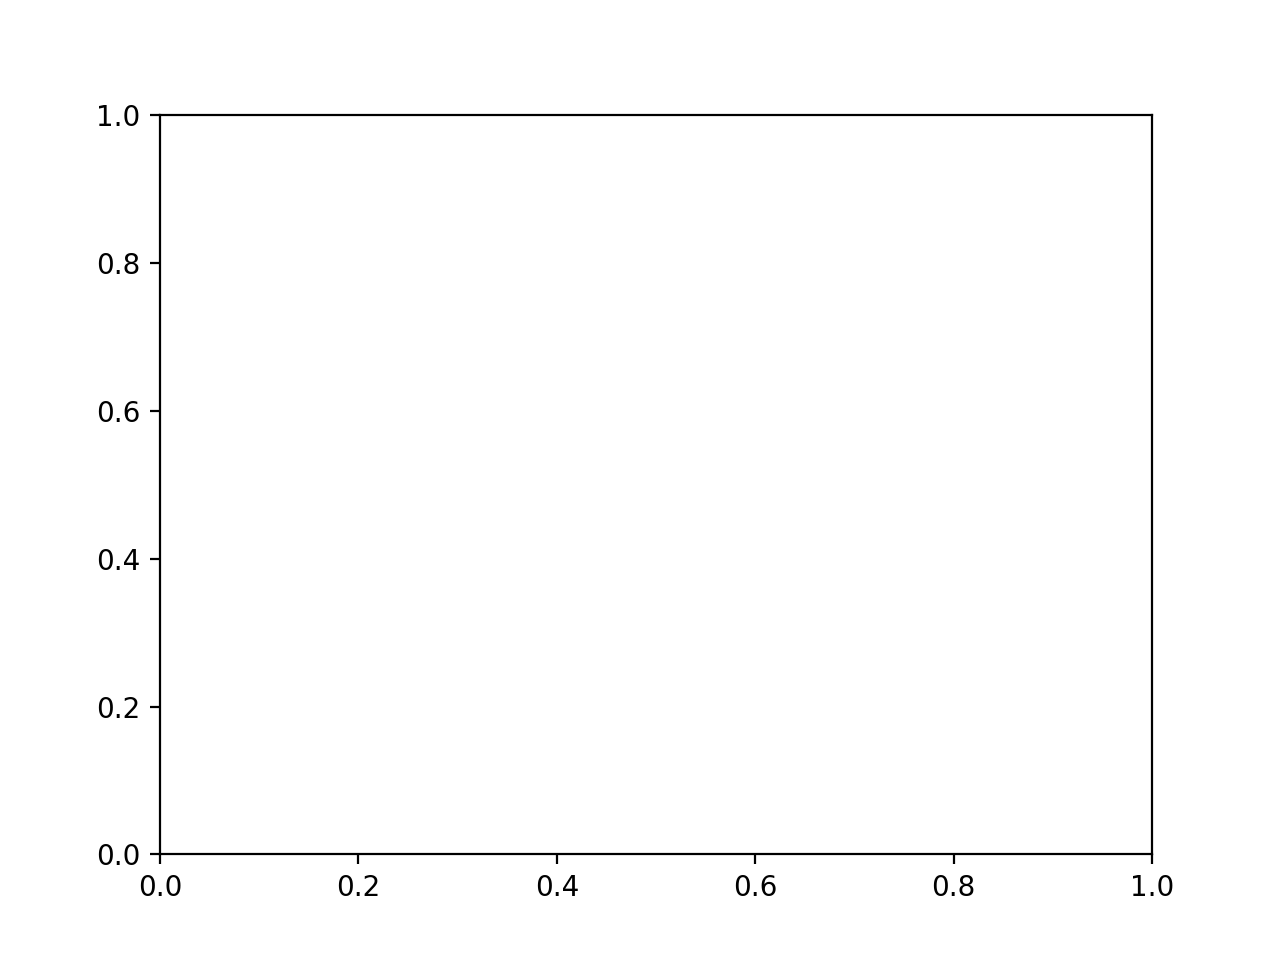

In [11]:
from matplotlib import animation
fig, ax = plt.subplots()


centroids = init_centroids(
    is_random = False, 
    amount = 4, 
    points= points,
    seed = 2)
# closest_centroids= compute_closest_centroids(centroids) 

J_hist = [-1] # init -1 to let compare with first value 

def update(curr):

    ax.clear()

    global closest_centroids
    global centroids
    global J_hist

    ax.scatter(x,y, c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        ax.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 


    closest_centroids = compute_closest_centroids(centroids) 
    centroids = compute_means(centroids, closest_centroids)
    
    new_J = J(centroids, closest_centroids, points)
    if J_hist[-1] == new_J:
        a.event_source.stop()
        
    J_hist.append(J(centroids, closest_centroids, points))
#     ax.plot(np.random.rand(10)) # use to test annimation is working 
    plt.title('Iteration # {}, J= {}'.format(curr, new_J)) # need to add it once more since it disappears with ax.clear()

a = animation.FuncAnimation(fig, update, interval=1000) # Note: you need to assign this in order to run the animation if you believe it necessary 



<font color = green >

### Another sample

</font>


![K-meams](https://upload.wikimedia.org/wikipedia/commons/e/ea/K-means_convergence.gif)

<font color = green >

### Review cost function

</font>


<IPython.core.display.Javascript object>


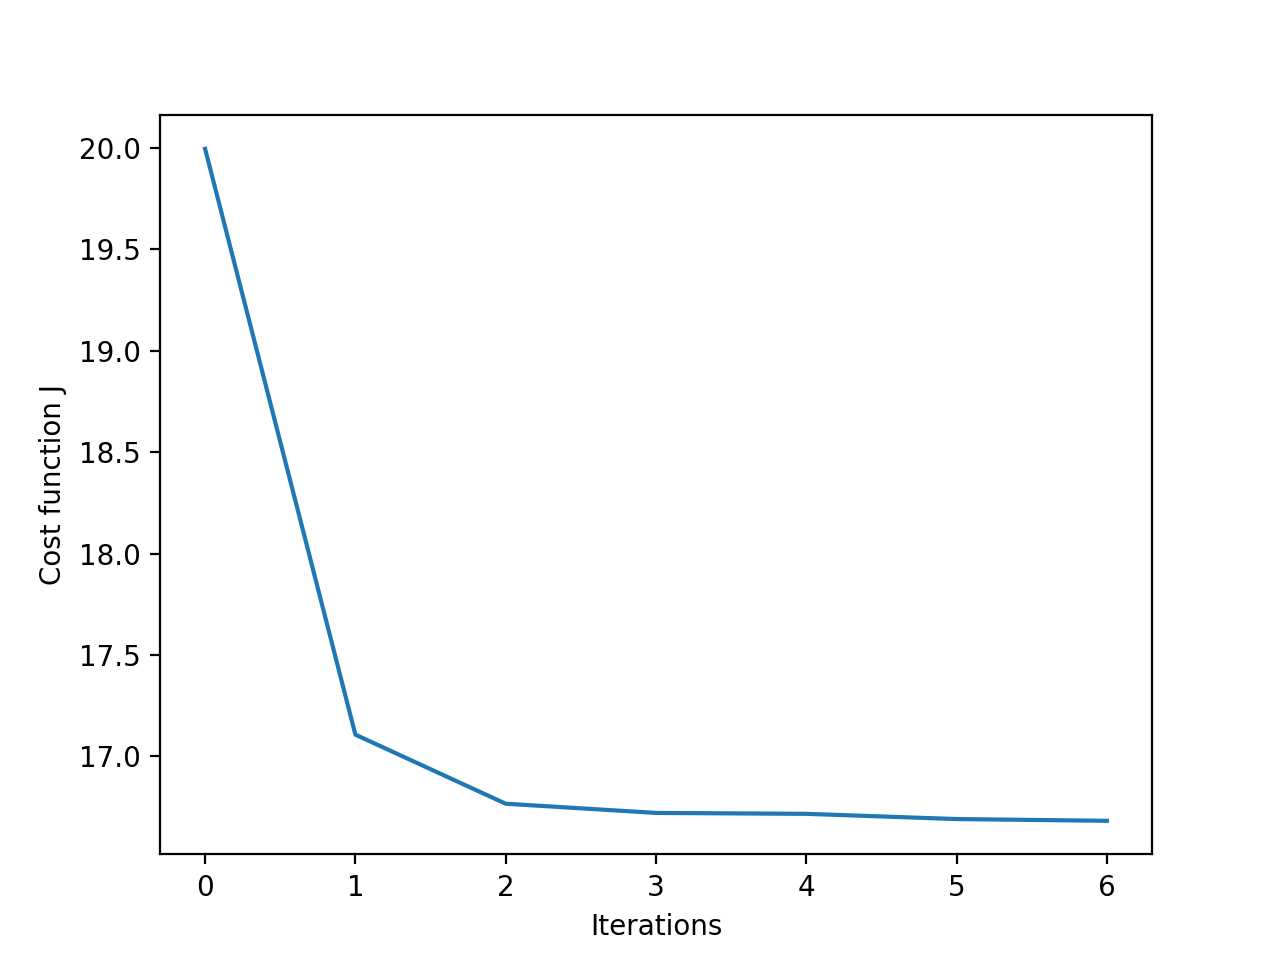

Text(0, 0.5, 'Cost function J')

In [12]:
def run_k_means(centroids):
    is_first_time= True 
    J_hist = []
    is_to_continue = True
    
    while is_to_continue:
        closest_centroids = compute_closest_centroids(centroids) 
        centroids = compute_means( centroids , closest_centroids) 
        new_J = J(centroids, closest_centroids, points)                
        if is_first_time:
            J_hist.append(J(centroids, closest_centroids, points))            
            is_first_time= False
            continue
        if J_hist[-1] == new_J:
            is_to_continue= False
        else: 
            J_hist.append(J(centroids, closest_centroids, points))         

    return centroids, closest_centroids, J_hist

centroids= init_centroids(amount = 4, points= points, is_random=False, seed= None )
centroids, closest_centroids, J_hist = run_k_means(centroids)
plt.figure ()
plt.plot(J_hist)
plt.xlabel('Iterations')
plt.ylabel('Cost function J')



<font color = green >

### Local  optimas
    
</font>

Clustering depends on initial centroids 


<IPython.core.display.Javascript object>


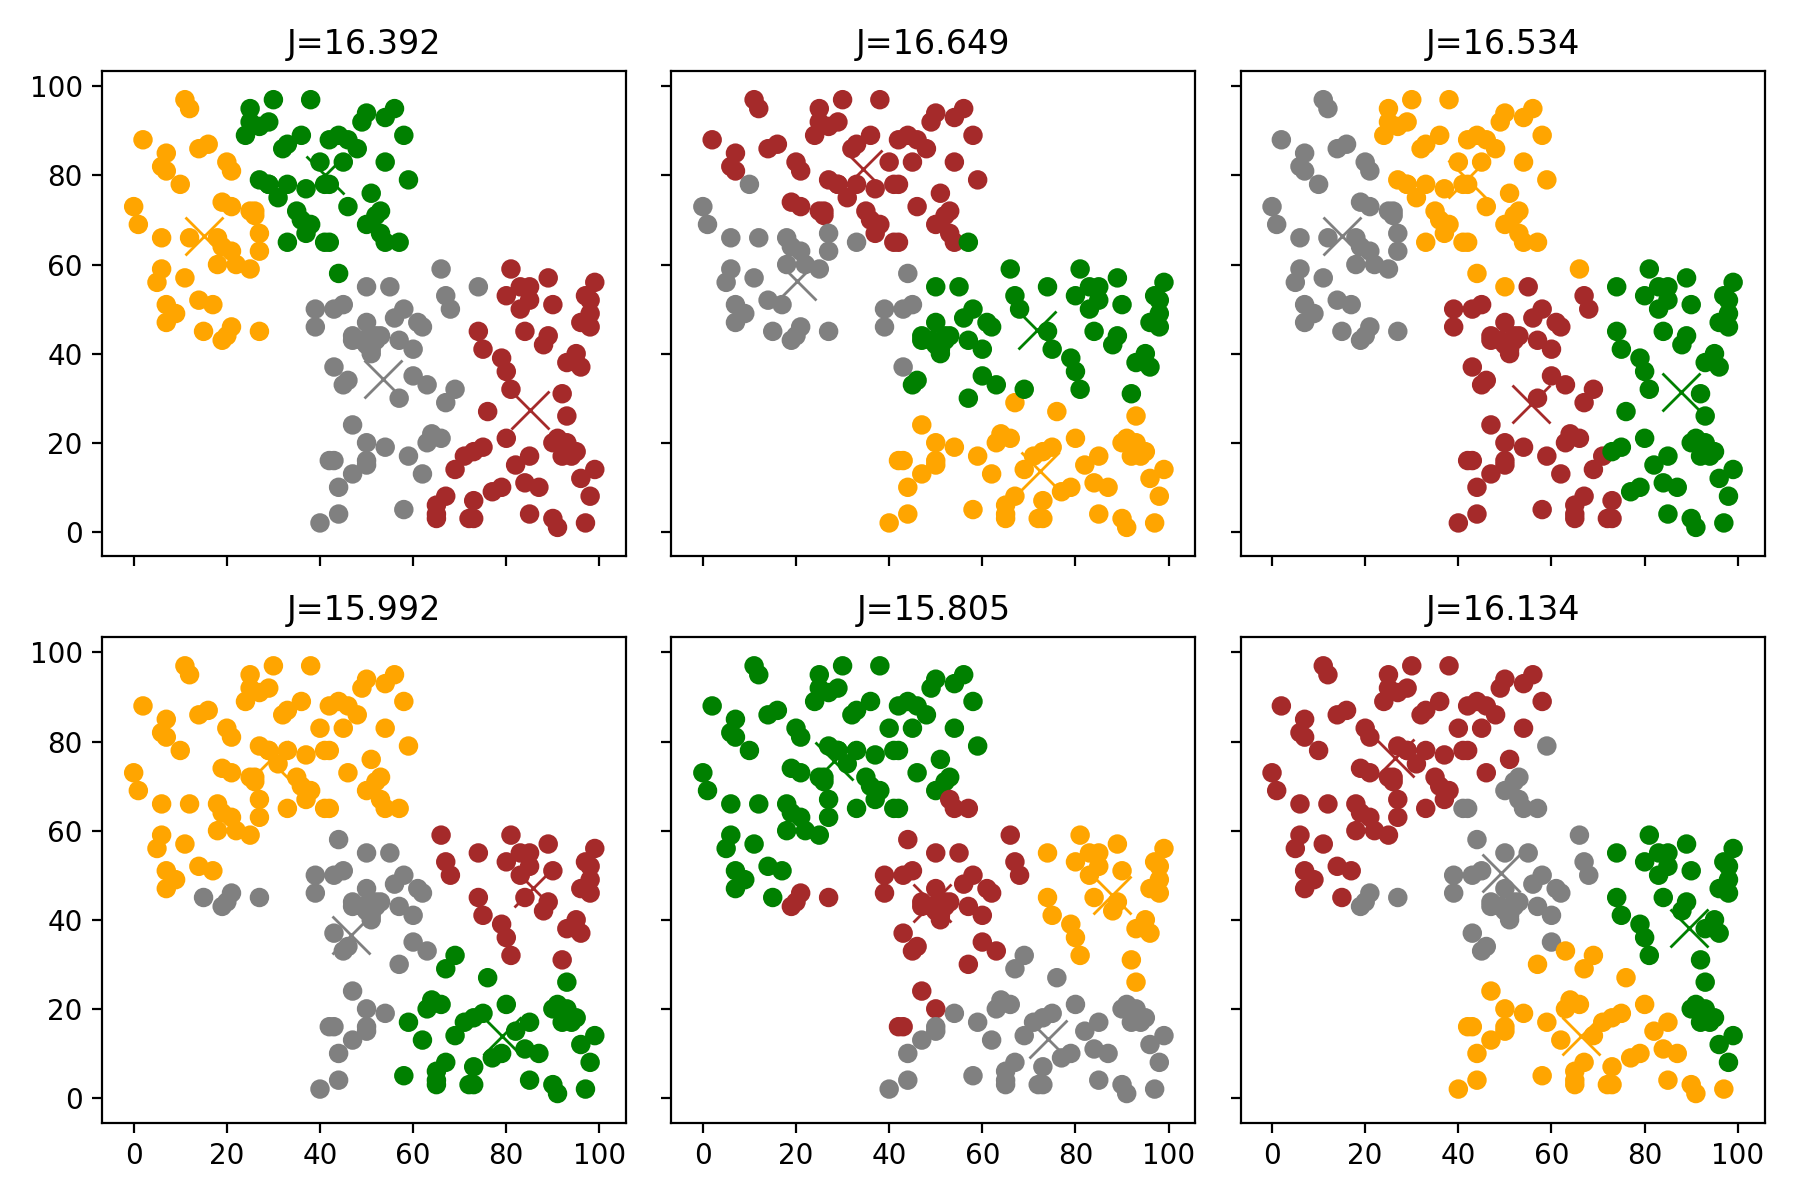

In [13]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex=True, sharey=True, figsize= (9,6))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]

for index_plot in range (6):
    centroids = init_centroids(is_random = True, amount =4, points= points,seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    print ()
    axes[index_plot].scatter(x,y, c= colors[closest_centroids])
    for i, c in enumerate (centroids):
        axes[index_plot].plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    plt.sca(axes[index_plot])
    plt.title ('J={:.3f}'.format(J_hist[-1]))

plt.tight_layout()

<font color = green >

### Random initialization

</font>


<IPython.core.display.Javascript object>


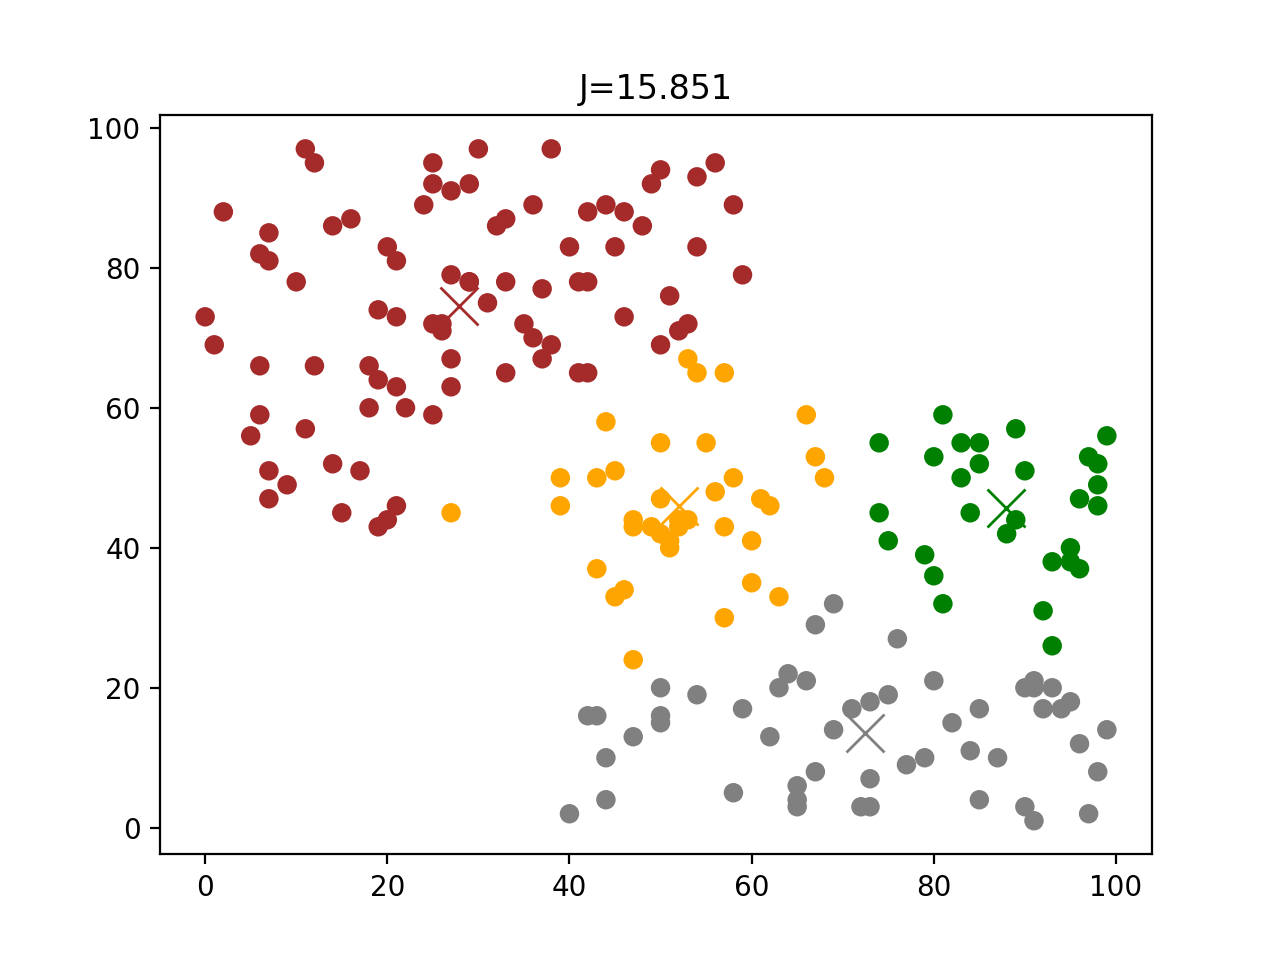

Text(0.5, 1.0, 'J=15.851')

In [14]:
best_result= []

for random_iter in range (100):  
    centroids = init_centroids(amount = 4, points= points, seed = None)
    centroids, closest_centroids, J_hist = run_k_means(centroids)  
    
    if len(best_result)==0 or J_hist[-1] < best_result[2]:
        best_result= [centroids, closest_centroids, J_hist[-1]]

plt.figure()
plt.scatter(x,y, c= colors[best_result[1]])
for i, c in enumerate (best_result[0]):
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
plt.title ('J={:.3f}'.format(best_result[2]))

# 16.079

<font color = green >

## Sklearn kmeans 

</font>

In [15]:
from sklearn.cluster import KMeans

In [16]:
clf = KMeans(n_clusters=4) # n_init : int, default: 10  - Number of time the k-means algorithm will be run with different centroid seeds.
clf.fit(points)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [17]:
predicted= clf.predict(points)
predicted

array([3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 3, 3, 1, 1,
       3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 1, 0, 3, 3, 1, 1, 1,
       1, 3, 1, 3, 1, 0, 1, 3, 0, 3, 1, 3, 1, 1, 1, 3, 3, 1, 3, 1, 1, 3,
       1, 1, 3, 0, 1, 0, 0, 3, 3, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1, 1, 1,
       1, 3, 0, 3, 1, 1, 1, 3, 3, 3, 3, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 0, 2, 2,
       0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0,
       0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2,
       0, 0], dtype=int32)

In [18]:
clf.cluster_centers_

array([[54.4       , 31.38181818],
       [15.04878049, 66.48780488],
       [86.64912281, 29.61403509],
       [41.17021277, 80.14893617]])

In [19]:
x1, x2 = np.array(list((zip(*points))))

<IPython.core.display.Javascript object>


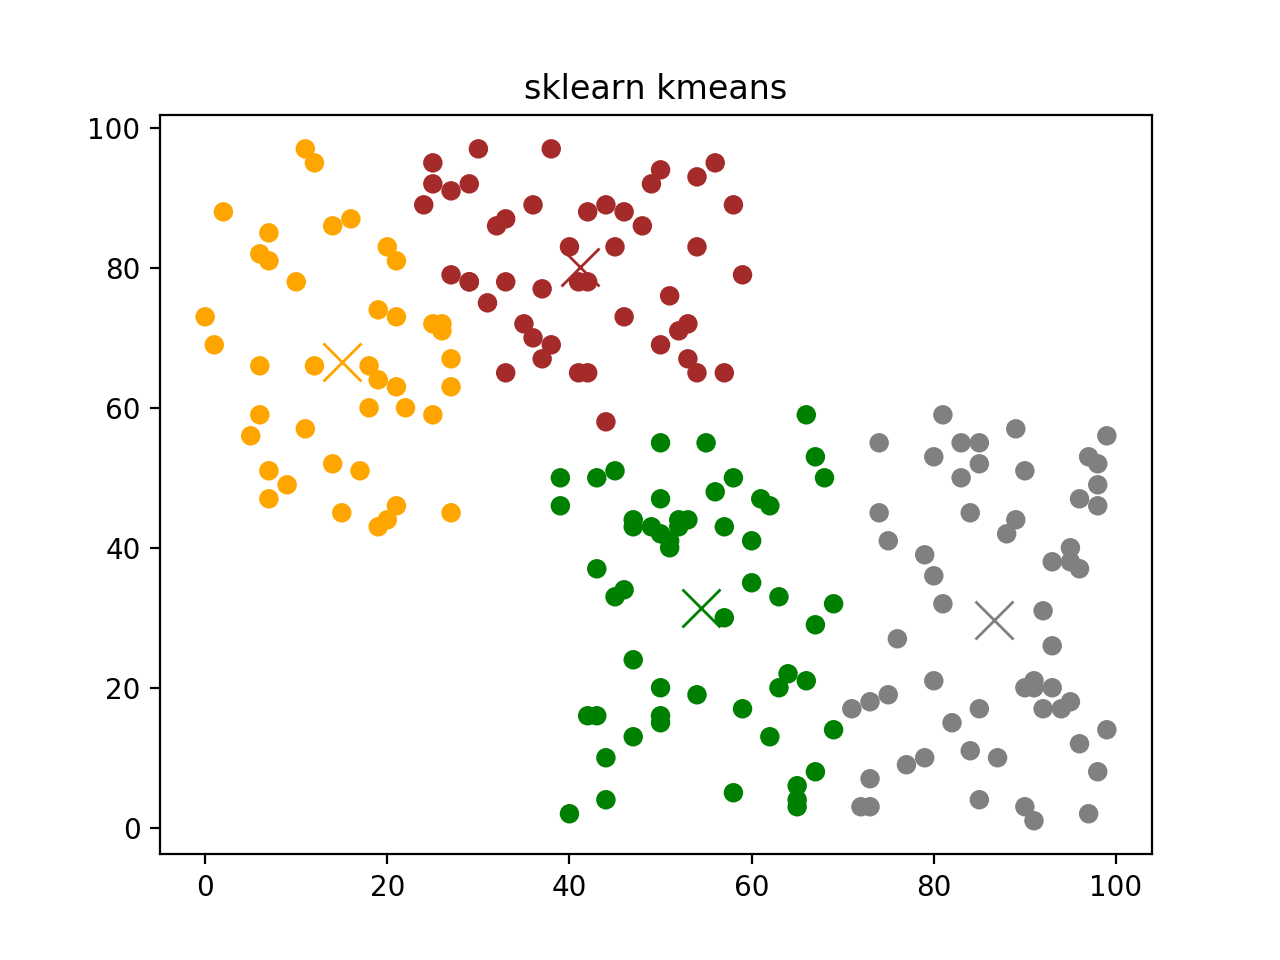

Text(0.5, 1.0, 'sklearn kmeans')

In [20]:
plt.figure()

# draw samples 
plt.scatter(x1,x2, c= colors[predicted])

# draw centroids 
for i, c in enumerate (clf.cluster_centers_):    
    plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 
    
plt.title ('sklearn kmeans')


<font color = green >

## Sample: Image compression with Kmeans

</font>

Each pixel is represented as the red, green and blue intensity values (RGB). This contains thousands of colors and the task is to reduce the number of colors. By making this reduction, it is possible to represent (compress) the photo in an efficient way. Specifically, store the RGB values of the 16 selected colors, and only store the index of the color for each pixel in the image. 

<font color = green >

### Load image

</font>

<IPython.core.display.Javascript object>


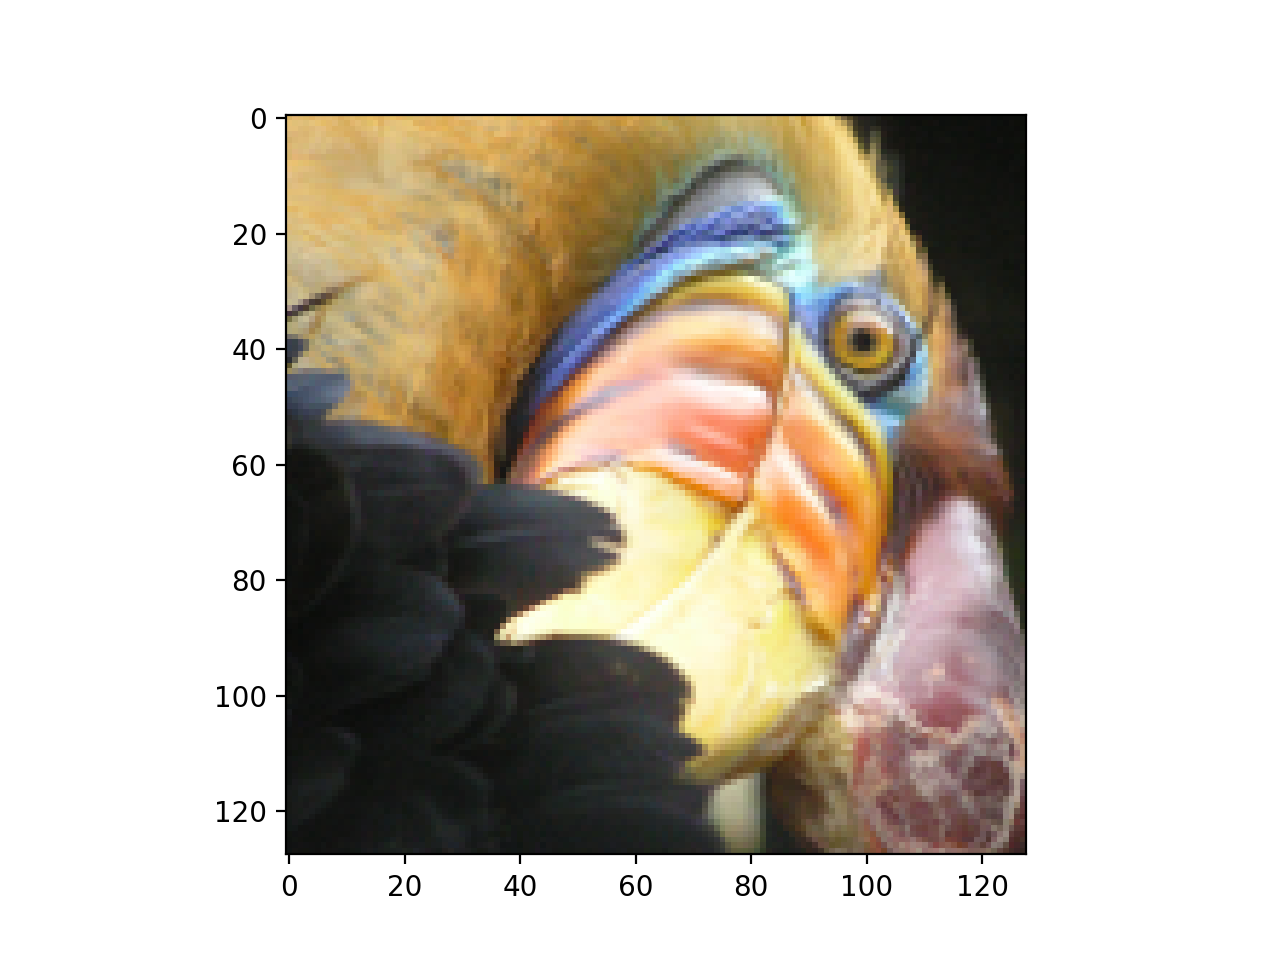

In [21]:
fn='bird_small.png'
image = np.array(plt.imread(fn))
plt.figure()
plt.imshow(image)

<font color = green >

### Review image data

</font>

In [22]:
image.shape

(128, 128, 3)

<font color = green >

### Reshape image to flatten all pixels

</font>

In [23]:
print ('image.shape:',image.shape)
img_reshaped = image.reshape (-1, 3) # flatten all pixels 
print ('img_reshaped.shape:',img_reshaped.shape)

image.shape: (128, 128, 3)
img_reshaped.shape: (16384, 3)


<font color = green >

### Apply Kmeans

</font>

In [24]:
from sklearn.cluster import KMeans

In [25]:
clf= KMeans(n_clusters=16).fit(img_reshaped)
print ('Cenroids:')
centroids = clf.cluster_centers_  

Cenroids:


<font color = green >

### Assign the one of $K$ color to every pixel 

</font>

In [26]:
predicted_colors = clf.predict(img_reshaped) # closest centroid for every pixel 
print  (predicted_colors.shape)
predicted_colors

(16384,)


array([ 9,  9,  9, ..., 11, 11, 11], dtype=int32)

<font color = green >

### Visualize the compressed image 

</font>

Essentially centroids and predicted_colors are values necessary to store compressed image  


In [27]:
img_recovered= centroids[predicted_colors] # assign to every pixel the values of closest centroid
print ('img_recovered.shape:', img_recovered.shape)
img_recovered # note values are the same for pixels assigned to the same centroid

img_recovered.shape: (16384, 3)


array([[0.8664006 , 0.7156675 , 0.45446572],
       [0.8664006 , 0.7156675 , 0.45446572],
       [0.8664006 , 0.7156675 , 0.45446572],
       ...,
       [0.15872344, 0.16129857, 0.152816  ],
       [0.15872344, 0.16129857, 0.152816  ],
       [0.15872344, 0.16129857, 0.152816  ]], dtype=float32)

<IPython.core.display.Javascript object>


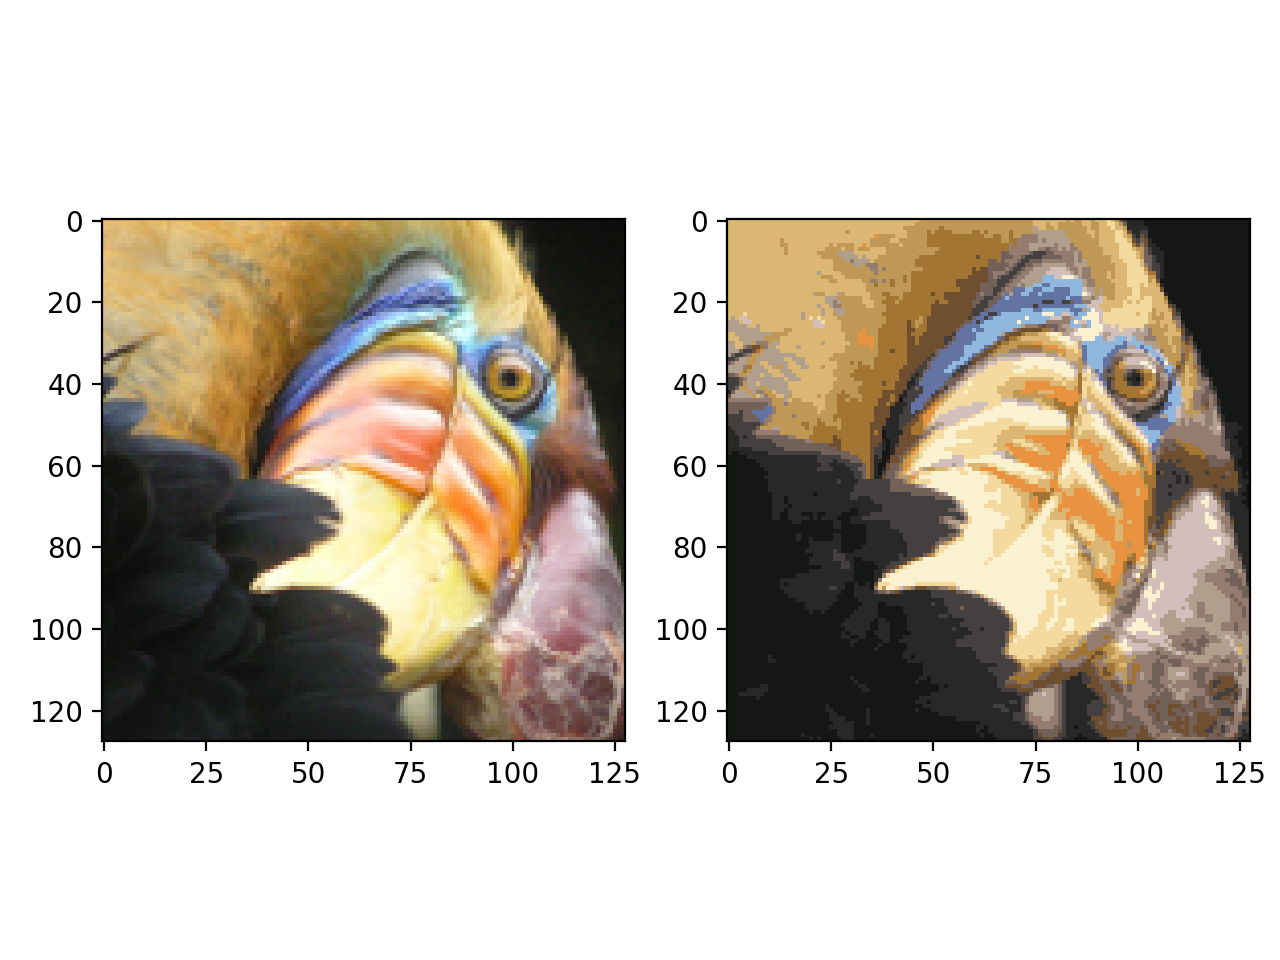

In [28]:
img_recovered_3d = img_recovered.reshape(image.shape[0], image.shape[1], 3)
plt.figure()
plt.subplot(1,2,1)
plt.imshow(image)
plt.subplot(1,2,2)
plt.imshow(img_recovered_3d)
plt.tight_layout()

<font color = green >

## Sample: Titanic classification with Kmeans

</font>

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
import seaborn as sns

<font color = green >

### Load data 

</font>

In [30]:
train_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv"
train_df = pd.read_csv(train_url)
test_url = "http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/test.csv"
test_df = pd.read_csv(test_url)

In [31]:
train = train_df.copy()
test = test_df.copy()

In [32]:
len(train), len(test)

(891, 418)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<font color = green >

### Review missed values 

</font>

In [34]:
def print_missing_srtatistic(): 
    print("train")
    print(train.isnull().sum())
    print("\n")
    print("test")
    print(test.isnull().sum())
print_missing_srtatistic()

train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


<font color = green >

### Handle missing values 

</font>
There are following approaches:

- Remove rows with missing values
- <font color = blue>Impute missing values  </font>

In this case lets keep the records since they may contain relevant information
<br>
There are following approaches to <strong>impute missing values </strong>:

- constant value that e.g. 0 (different from all other values)
- corresponding value of randomly selected record
- <font color = blue>mean of all corresponding available values  </font>
- value estimated by another machine learning model

In [35]:
# train.fillna(0, inplace=True)
# test.fillna(0, inplace=True)

train.fillna(train.mean(), inplace=True) # Note this fills separate value for every column
test.fillna(test.mean(), inplace=True)

print_missing_srtatistic() # not filled the ones that are not numerical (mean is not available)
# Leave as they are -  will drop those features as irrelevant 

train
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


test
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [36]:
# train.fillna(0, inplace=True)
# test.fillna(0, inplace=True)

# print_missing_srtatistic() 

<font color = green >

### Review features  (optional)

</font>


In [37]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [38]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [39]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


<IPython.core.display.Javascript object>


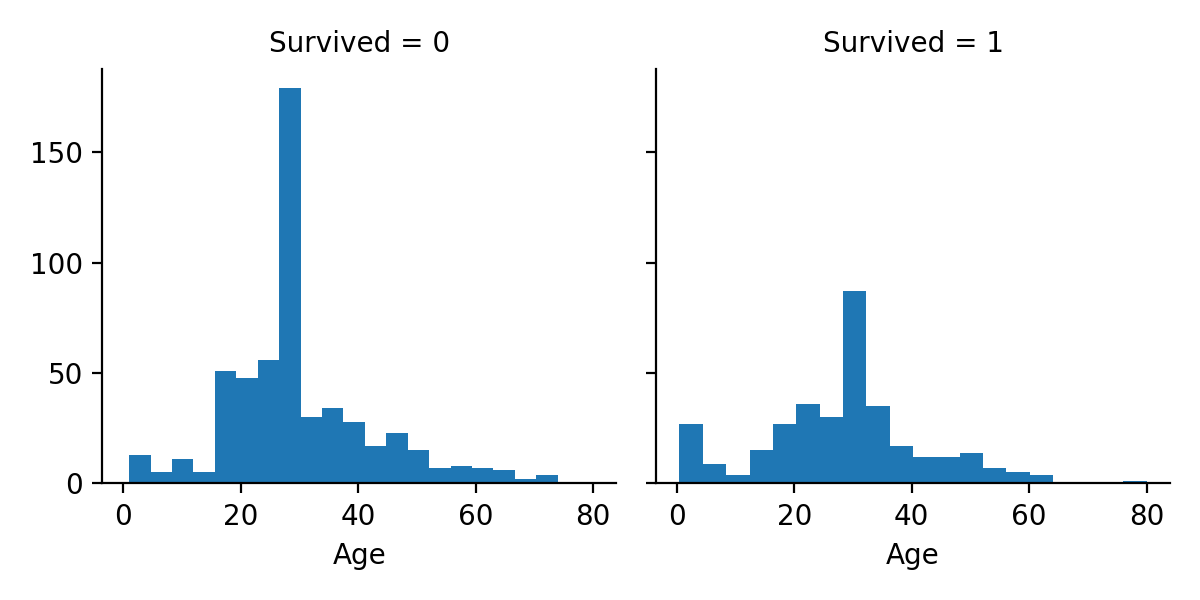

In [40]:
# age has too mane values so use the histogram  
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

<font color = green >

### Drop irrelevant features 

</font>

In [41]:
# for demo 
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

<font color = green >

### Convert the features to numerical 

</font>

In [42]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


<font color = green >

#### Convert Remaining non-numerical features 

</font>

In [43]:
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])

In [44]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [45]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         418 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.0 KB


<font color = green >

### Separate lablels

</font>

In [46]:
X_train = np.array(train.drop(['Survived'], 1))#.astype(float))
y_train = np.array(train['Survived'])
X_test = np.array(test) # .astype(float)

<font color = green >

### Scale features 

</font>

In [47]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<font color = green >

### Train  model 

</font>

In [48]:
kmeans = KMeans(n_clusters=2) # Survived or Not survived
kmeans.fit(X_train_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<font color = green >

### Evaluate model 

</font>

In [49]:
def compute_train_accuracy():
    y_train_predicted = kmeans.predict(X_train_scaled)
    train_accuracy = np.mean(y_train_predicted== y_train)    
    return train_accuracy

for random_state in range (10):
    kmeans = KMeans(n_clusters=2, random_state=random_state)  # 0 vs 2 
    kmeans.fit(X_train_scaled)    
    print (compute_train_accuracy() )


0.7867564534231201
0.2132435465768799
0.7867564534231201
0.7867564534231201
0.2132435465768799
0.7867564534231201
0.7867564534231201
0.7867564534231201
0.7867564534231201
0.2132435465768799


<font color = green >

### Match clusters to labels

</font>

Consider the majority of correct prediction of train set 

In [50]:
# Clusters indices may appear opposite to prediction labels 
def predict_corrected(X_to_predict):    
    if compute_train_accuracy() > .5:
        return kmeans.predict(X_to_predict)
    else: 
        return 1- kmeans.predict(X_to_predict)


for random_state in range (8):
    kmeans = KMeans(n_clusters=2, max_iter=500, random_state=random_state)  # 0 vs 2 
    kmeans.fit(X_train_scaled)

    y_train_predicted_corrected = predict_corrected(X_train_scaled)
    accuracy_corrected = np.mean(y_train == y_train_predicted_corrected)
    print ('{} ->  {}'.format (compute_train_accuracy(), accuracy_corrected))



0.7867564534231201 ->  0.7867564534231201
0.2132435465768799 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201
0.2132435465768799 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201
0.7867564534231201 ->  0.7867564534231201


<font color = green >

### Predict  test set 

</font>

In [51]:
kmeans.predict(X_test_scaled)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [52]:
predict_corrected(X_test_scaled)

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
df_res= test.copy()
df_res['Survived'] = pd.Series (predict_corrected(X_test_scaled))
df_res = df_res[['PassengerId', 'Survived']]
df_res.head(20)


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [54]:
import os
cwd= os.getcwd() 
path = os.path.join(cwd,'data') 
fn = 'titanic_submission_kmeans.csv'
df_res.to_csv(fn, index=False)

# Score = 0.76555

<font color = green >

## Elbow method to determine the optimal k

</font>


<IPython.core.display.Javascript object>


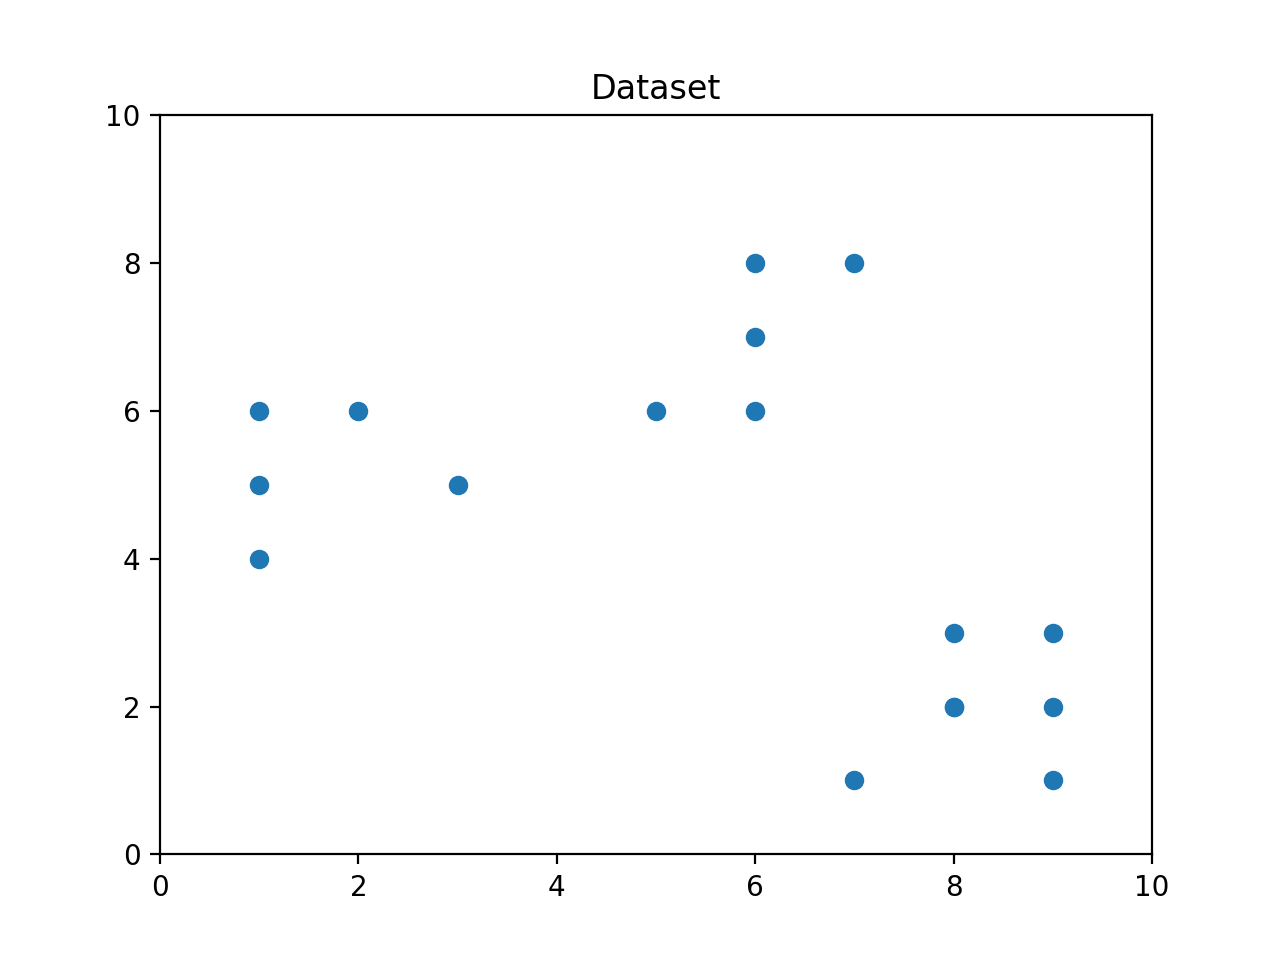

<IPython.core.display.Javascript object>


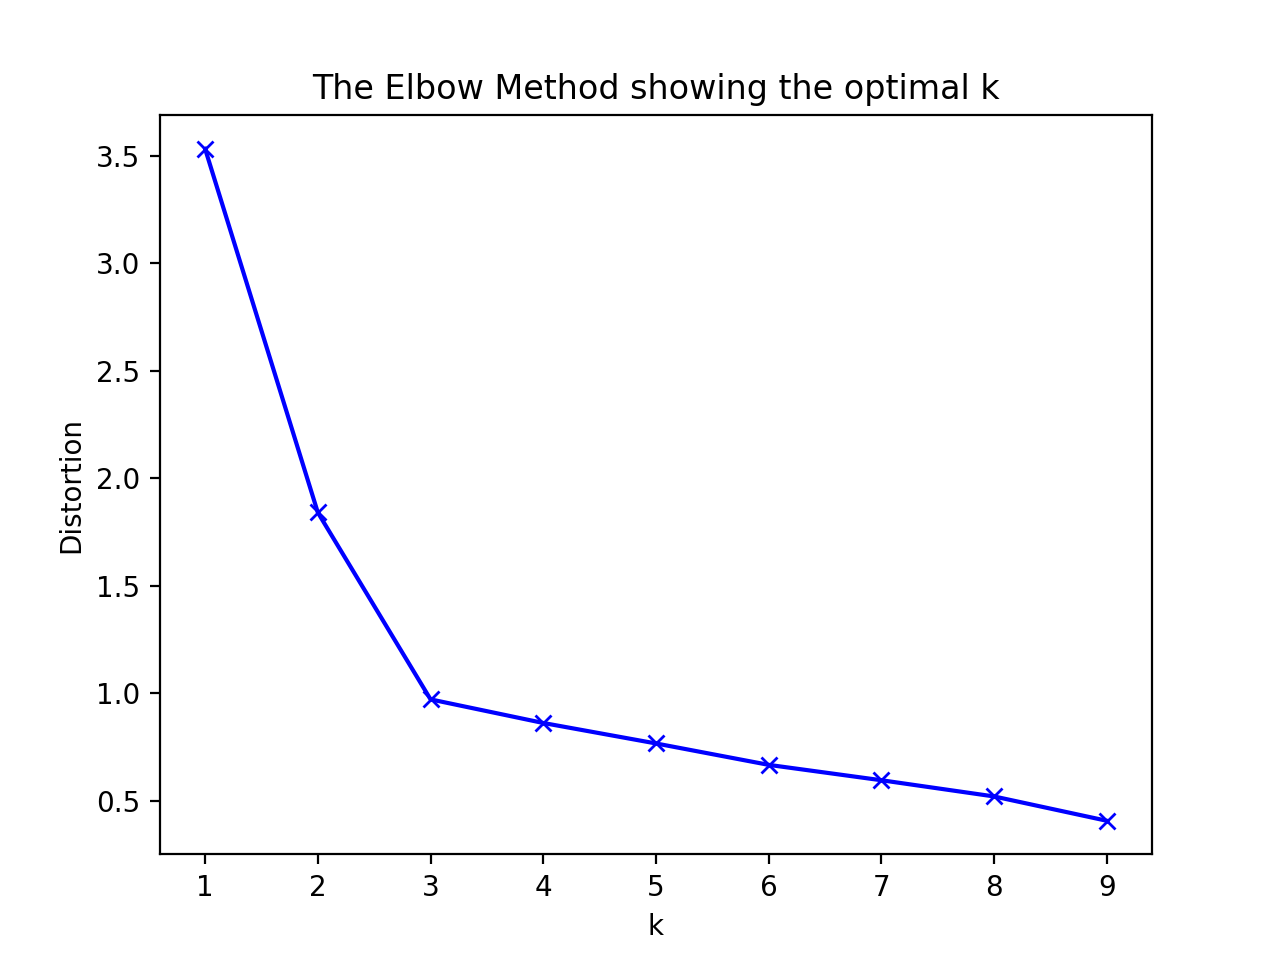

In [69]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

x1 = np.array([3, 1, 1, 2, 1, 6, 6, 6, 5, 7, 7, 8, 9, 8, 9, 9, 8])
x2 = np.array([5, 4, 5, 6, 6, 8, 6, 7, 6, 8, 1, 2, 1, 2, 3, 2, 3])

plt.figure()
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Dataset')
plt.scatter(x1, x2)
plt.show()

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

def plot_distortions(X):
    # k means determine k
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        # cdist(X, kmeanModel.cluster_centers_, 'euclidean') - matrix of distances between each x and eac h cluster,  shape = (len(X), k)
        # then get min distance for each samnple (axis=1)    
        # sum up all distances
        # get averarage for all samples     
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


    # Plot the elbow
    plt.figure()
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()

plot_distortions(X)

#### The best K may appear not that obvious for other datasets

<IPython.core.display.Javascript object>


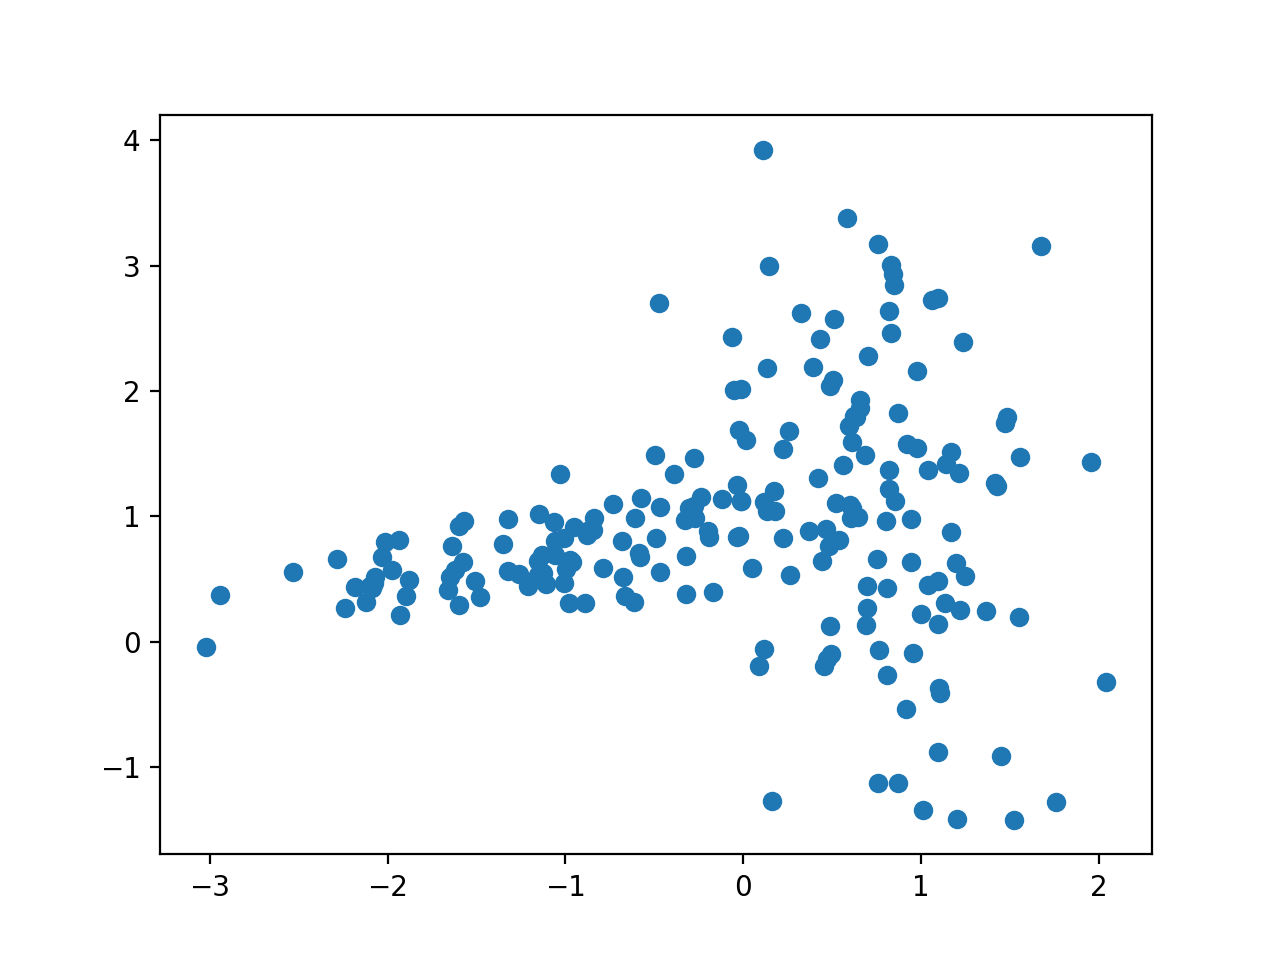

In [75]:
from sklearn.datasets import make_classification
Xc_2,_= make_classification(n_samples=200,
                                    n_features=2,
                                    n_informative=2,
                                    n_redundant=0,
                                    random_state=0,
                                    n_clusters_per_class=1,
                                    class_sep = 0.8)
plt.figure()
plt.scatter  (Xc_2[:,0], Xc_2[:,1])

<IPython.core.display.Javascript object>


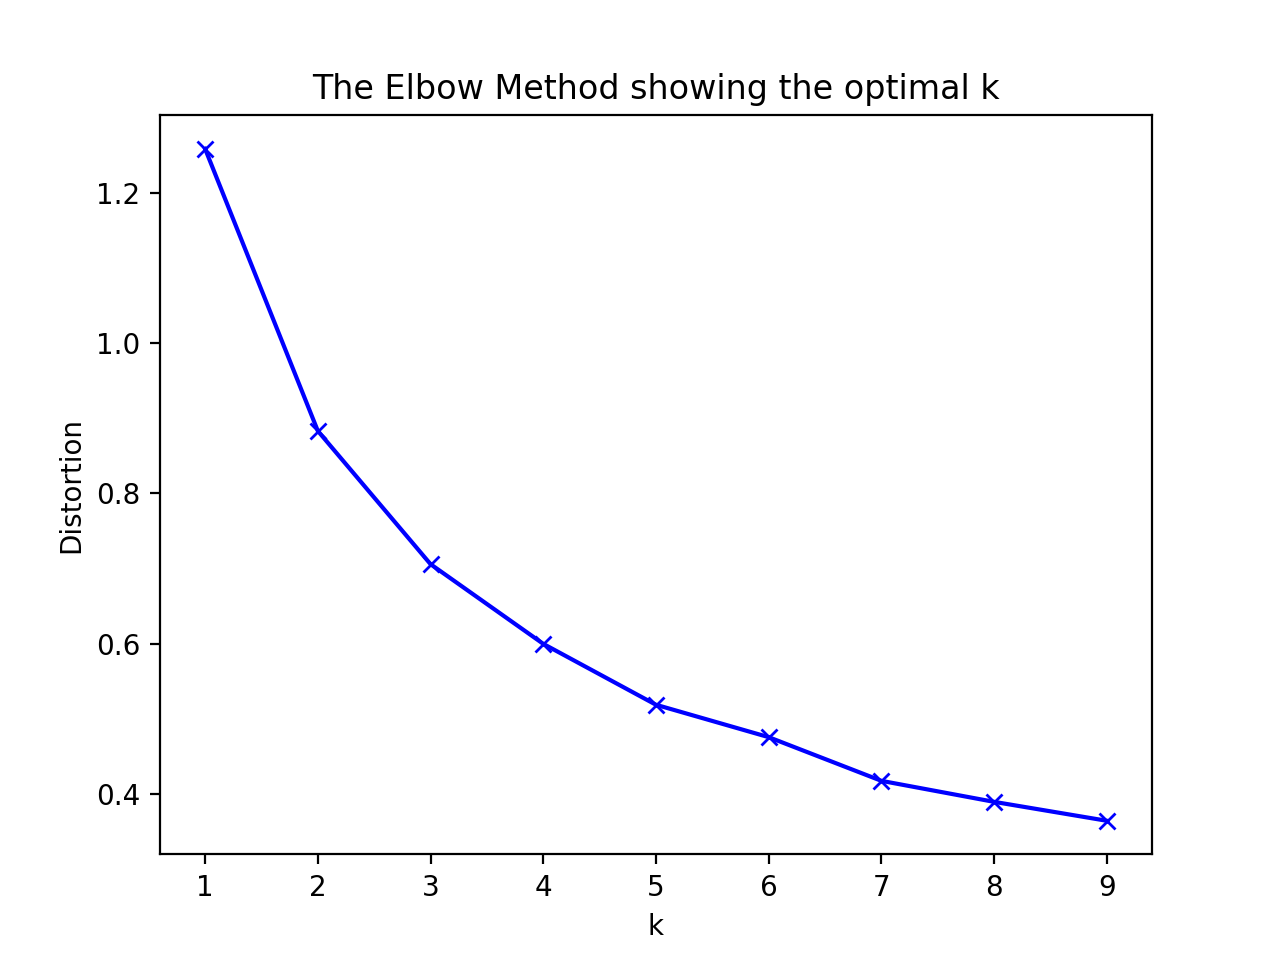

In [74]:
plot_distortions(Xc_2)

<IPython.core.display.Javascript object>


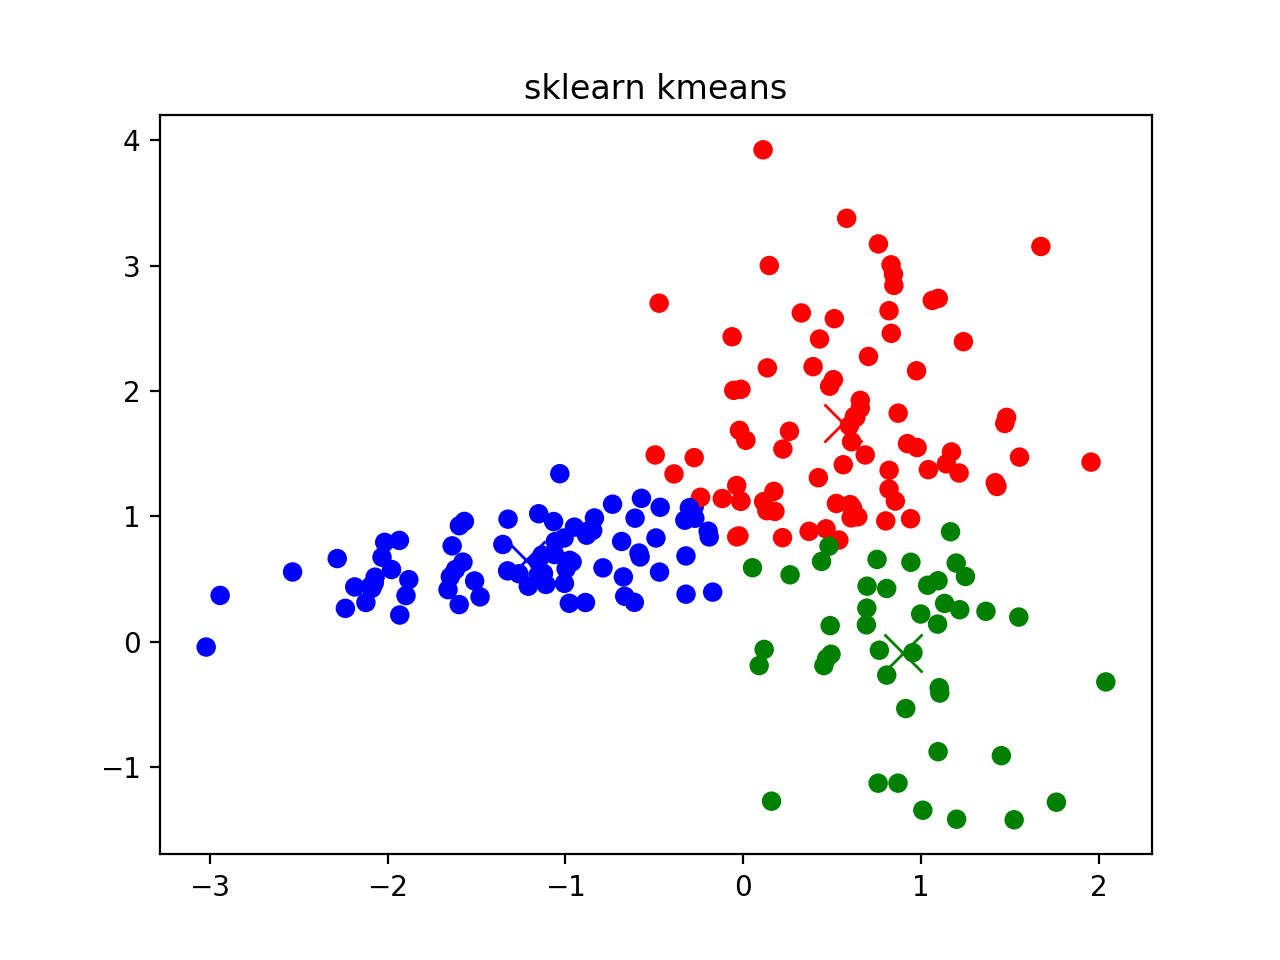

<IPython.core.display.Javascript object>


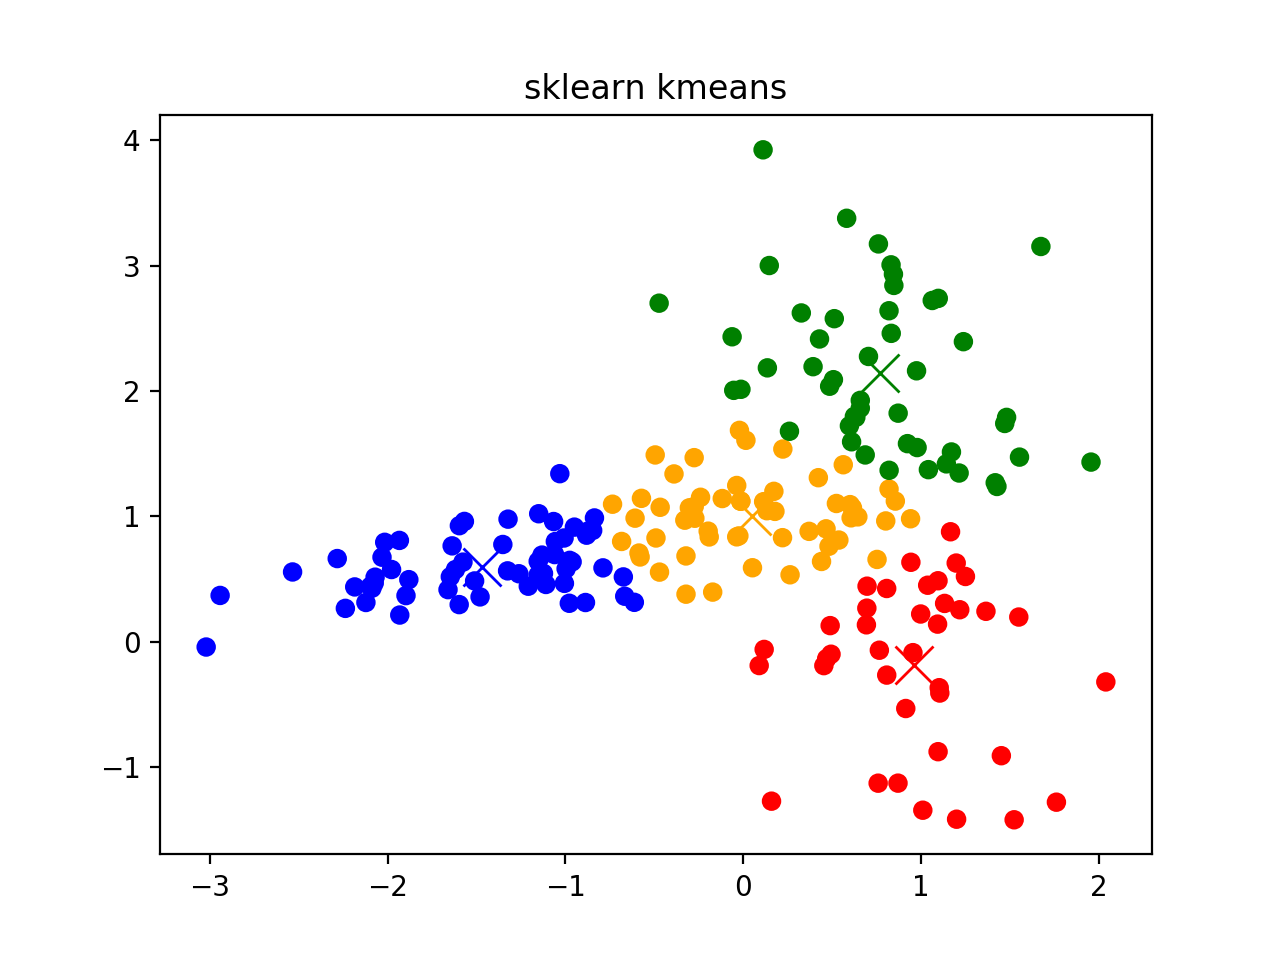

<IPython.core.display.Javascript object>


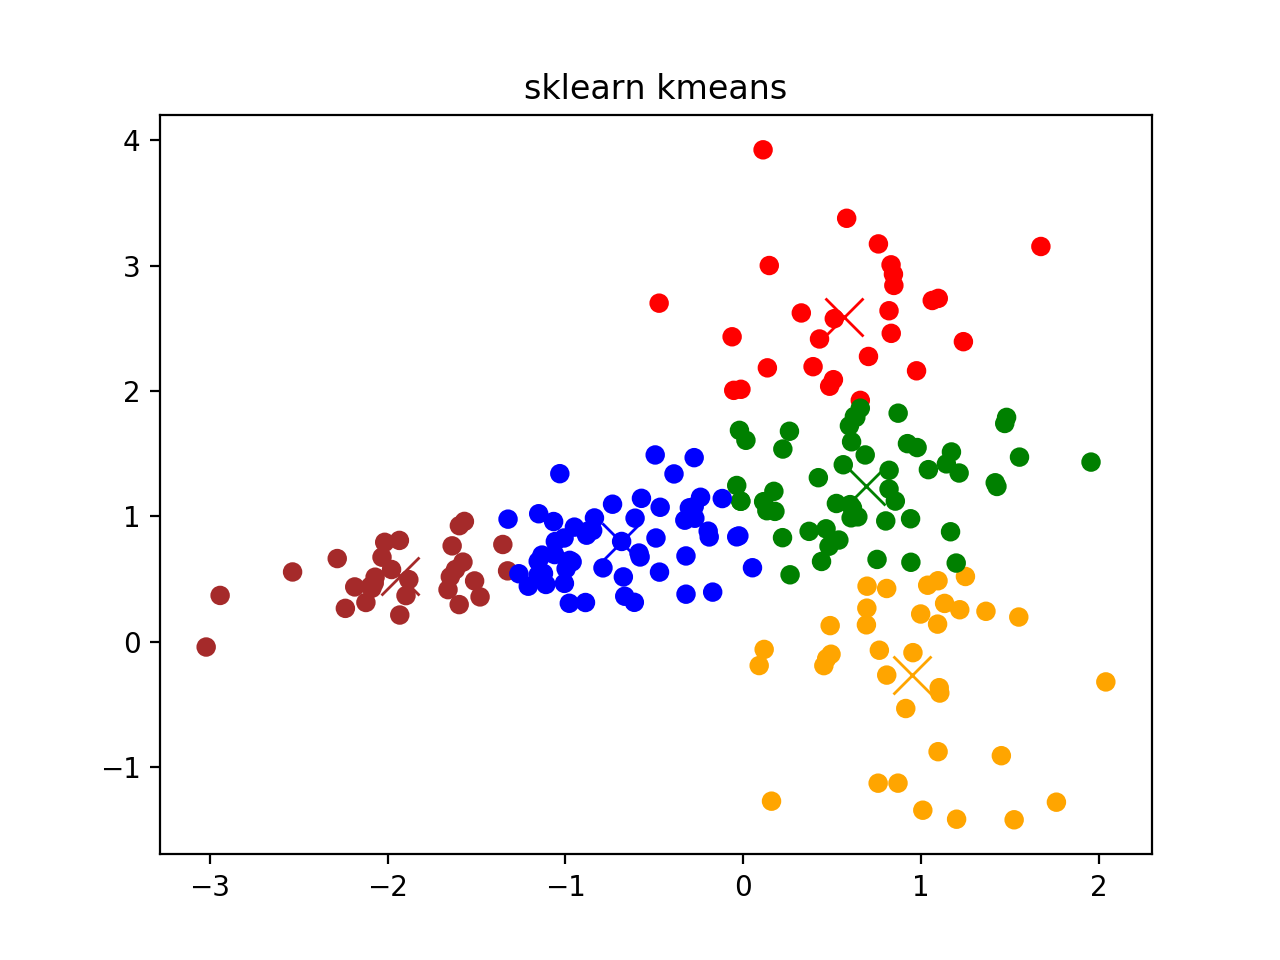

In [106]:
def draw_clustered(X, n_clusters):
    clf = KMeans(n_clusters=n_clusters) 
    clf.fit(X)
    predicted= clf.predict(X)
    plt.figure()

    # draw samples 
    colors= np.array(['blue', 'green', 'red', 'orange', 'brown','black' , ''])
    plt.scatter(X[:,0],X[:,1], c= colors[predicted])

    # draw centroids 
    for i, c in enumerate (clf.cluster_centers_):    
        plt.plot(c[0], c[1], marker = 'x', color= colors[i], markersize=14) 

    plt.title ('sklearn kmeans')

for k in [3,4,5]:
    draw_clustered(Xc_2,k)


<font color = green >

## Learn more
</font>

[K-means clustering: how it works](https://www.youtube.com/watch?v=_aWzGGNrcic)

[sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)


[K-Means Clustering in Python with scikit-learn](https://www.datacamp.com/community/tutorials/k-means-clustering-python)